![](./Astropy_banner.png)

# FITS file handling in the SciPy environment

The standard format for storing astronomical data is the **FITS** format. FITS stands for **F**lexible **I**mage **T**ransport **S**ystem.

The basic unit in a FITS file is an **HDU** - A **H**eader- and **D**ata **U**nit. Each HDU consists of - tadaa! - a header and some data. The header is in ASCII text format, the data us either stores as a binary array or as an ascii text table. The header contains of rows of (Keyword, Value, Comment) sets, and contains all sorts of information that may be deemed relevant for the data set - observing time, weather conditions, instrument settings, reduction pipeline version, name of observer, etc. etc.

The package we shall use is an integrated part of the **Astropy** library. It was originally called PyFITS and developed by, among others, the Space Telescope Science Institute (STScI), which runs the Hubble Space Telescope and the upcoming James Webb Space Telescope. You will find the name PyFITS in many online searches etc., but it has been incorporated into Astropy a couple of years back, and the standalone version is no longer developed.

We shall look at some basic FITS file reading and saving, header manipulation and creation, and some basic plotting. First, the usual imports.

In [62]:
#from IPython.display import 
from IPython.display import display, HTML, YouTubeVideo
import matplotlib.pyplot as plt
import pprint as pp
import scipy as sp
from astropy.io import fits
# Write 'qt4' instead of 'inline' below for interactive 
# figure windows rather than static, embedded plots. 
%matplotlib inline

## Opening a FITS file

The basic way to open a FITS file is by:

In [63]:
MyData = fits.open('LARS8.fits')
print(type(MyData))
MyData

<class 'astropy.io.fits.hdu.hdulist.HDUList'>


We see that MyData is an `HDUlist` object; an (enhanced) list of HDU objects, the first one being a `PrimaryHDU` and the two extensions being `ImageHDU`'s. The difference between these is subtle, and you can take a look at the `astropy.io.fits` [documentation] for an explanation. Often, it is fine to just use one to three `PrimaryHDU`'s to create a FITS file. Let's take a look at the HDUs.

In [64]:
MyData[0].header[:30]  # Or in a script: print(repr(MyData[0].header))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
IRAF-TLM= '2011-05-24T22:57:14' / Time of last modification                     
NEXTEND =                    3 / Number of standard extensions                  
DATE    = '2011-05-24T22:57:14' / date this file was written (yyyy-mm-dd)       
FILENAME= 'ibjc38030_drz.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'WFC3  '          

In [65]:
len(MyData[0].header)

370

...that was a long header. 

Each row consists of a *key*, a *value* and a *comment* to kindly tell what each keyword means. 
They are accessed row-wise like you do a `dict`: 

In [66]:
print MyData[0].header['TELESCOP'] 
print MyData[0].header.comments['TELESCOP']

HST
telescope used to acquire data


They can be set the same way:

In [67]:
MyData[0].header['NEWKEY'] = 60.42
MyData[0].header.comments['NewKey'] = 'Some random number'

In [68]:
print MyData[0].header['NEWKEY']
print MyData[0].header.comments['NEWKEY']

60.42
Some random number


Now, a look at the data:

In [69]:
print MyData[0].data

None


...Oh. Not much there. 
This is an HST way of doing things - using a `PrimaryHDU` as a 'wrapper', with a header containing some general info about the observation, but no actual data. Now let's look at the data extensions:

In [70]:
print(MyData[1].data.shape)
print(MyData[2].data.shape)

(2000, 2000)
(2000, 2000)


Each contains a 4 Mpix array. 

**Please note** that this is not the only way of doing it. It is perfectly fine to just save a file with just one primary HDU containing the data.

### Convenience functions for reading data:

If you already know what is in each HDU, and you just need to read the data in a file, it is easy and quick to get the info with the convenience function `getdata()`, and a header with `getheader()`:

In [71]:
imdata, imhead = fits.getdata('LARS8.fits', header=True)  # Two objects
flag_thingie = fits.getdata('LARS8.fits', 2)
flag_thing_head = fits.getheader('LARS8.fits', 2)

# Sanity check:
print((imdata - MyData[1].data).max())

0.0


...Yay!

## Saving FITS files

Any `HDUList` or `PrimaryHDU` object has a `writeto()` method that can be called to save it to a FITS file. It is as simple as this:

In [72]:
# MyData.writeto('my_filename.fits')

If we have just opened the file and made a few changes and want to save it back to the original file, we can simply run:

In [73]:
# MyData.flush()

## FITS data

The data of a FITS file can either be an array of numbers (most often an image with each number being the flux in a pixel), or a table in ascii format (most often used for heterogenous data or e.g. 1D-spectra).

In this case we are looking at two arrays. Table arrays are acessed in the exact same way. When the data is a binary array, it is simply saved into a NumPy array.

In [74]:
print(type(MyData[1].data))

<type 'numpy.ndarray'>


...which - huzzah! - means that we can easily apply our newly gained knowledge to perform our Python-Fu on these arrays and e.g. perform data reduction, plotting, cropping, whatnot. Let's try and plot it (the `vmin` and `vmax` cut levels are just found by trial and error until it looks nice).

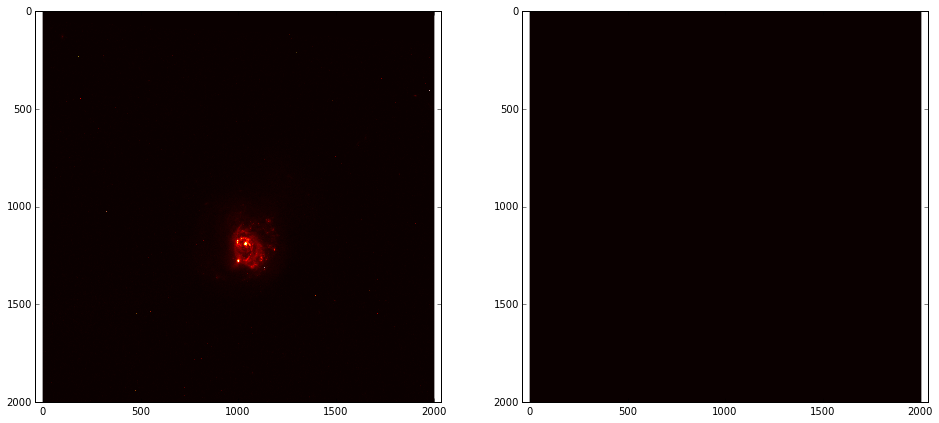

In [75]:
%matplotlib inline
fig1 = plt.figure(1, figsize=(16, 7))
ax1 = fig1.add_subplot(121)
ax1.imshow(MyData[1].data, vmin=-.001, vmax=2.5, cmap='hot')
ax2 = fig1.add_subplot(122, sharex=ax1, sharey=ax1)
ax2.imshow(MyData[2].data, vmin=500, vmax=500, cmap='hot')

So clearly, the first HDU is the image data, while the second is some kind of image quality flagging (yours truly must admit to not knowing exactly what it means).

### *Exercise*:

Crop the FITS image to a $1000 \times 1000$ pixels size, and save a new FITS file with the same HDU structure as the original one. Hint: Look at what happens to the `NAXIS1` and `NAXIS2` header values before and after you set `MyData[1]` to the new, smaller array. It's so beautiful!

In [76]:
MyData = fits.open('LARS8.fits')
print MyData[1].header['NAXIS1']
print MyData[1].header['NAXIS2']
MyData[1].data = MyData[1].data[600:1600, 700:1700]
MyData[2].data = MyData[2].data[600:1600, 700:1700]
print MyData[1].header['NAXIS1']
print MyData[1].header['NAXIS2']


2000
2000
1000
1000


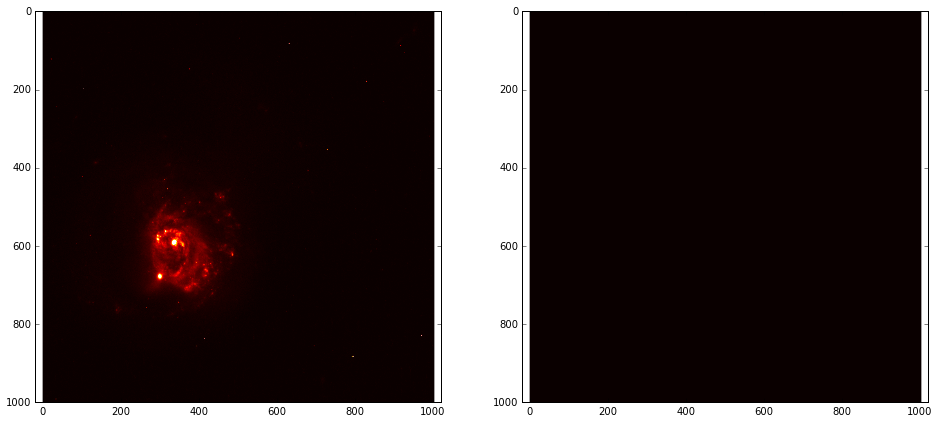

In [77]:
%matplotlib inline
fig1 = plt.figure(1, figsize=(16, 7))
ax1 = fig1.add_subplot(121)
ax1.imshow(MyData[1].data, vmin=-.001, vmax=2.5, cmap='hot')
ax2 = fig1.add_subplot(122, sharex=ax1, sharey=ax1)
ax2.imshow(MyData[2].data, vmin=500, vmax=500, cmap='hot')

...much better!

In [33]:
# MyData.writeto('LARS8_cropped.fits')

In [34]:
# ls

## Bonus: beautify your FITS image figures

If you want to create extra beautiful images, the package APLpy can help. It is an Astropy/affiliated package, meaning that i utilizes the Astropy framework and integrates well with Astropy but is not a part of the core library. It uses matplotlib to plot the figures. A little taste of its functionality is here:

INFO:astropy:Auto-setting vmin to -2.189e-01


INFO: Auto-setting vmin to -2.189e-01 [aplpy.core]


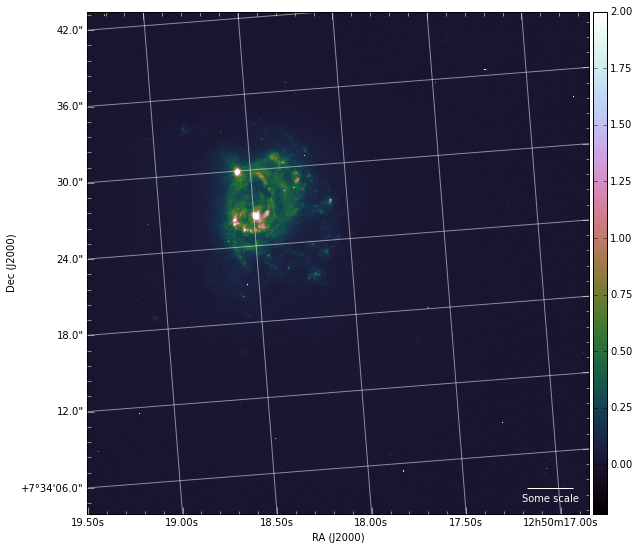

In [61]:
import aplpy
fig = aplpy.FITSFigure(MyData[1], facecolor='w')
fig.show_colorscale(cmap='cubehelix', vmax=2.)
fig.add_colorbar()
fig.add_grid()
fig.add_scalebar(0.001, color='w')
fig.scalebar.set_label('Some scale')